In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('weather.csv')

In [4]:
df.head()

,DATE,MONTH,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max,wind_speed,wind_direction,rainfall
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,NaN,NaN,NaN
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,NaN,NaN,NaN
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,NaN,NaN,NaN
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,NaN,NaN,NaN
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,NaN,NaN,NaN


In [5]:
df.drop(columns=['wind_speed','wind_direction','rainfall'], inplace=True)

In [6]:
df.head()

,DATE,MONTH,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              3654 non-null   int64  
 1   MONTH             3654 non-null   int64  
 2   cloud_cover       3654 non-null   int64  
 3   humidity          3654 non-null   float64
 4   pressure          3654 non-null   float64
 5   global_radiation  3654 non-null   float64
 6   precipitation     3654 non-null   float64
 7   sunshine          3654 non-null   float64
 8   temp_mean         3654 non-null   float64
 9   temp_min          3654 non-null   float64
 10  temp_max          3654 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 314.1 KB


In [8]:
df.isnull().sum()

DATE                0
MONTH               0
cloud_cover         0
humidity            0
pressure            0
global_radiation    0
precipitation       0
sunshine            0
temp_mean           0
temp_min            0
temp_max            0
dtype: int64

In [9]:
df.shape

(3654, 11)

In [10]:
from datetime import datetime

def change_date(date):
#     date_string = "20000101"
    date_string = str(date)
    formatted_date = datetime.strptime(date_string, "%Y%m%d")

    date_without_time = formatted_date.date()
    return date_without_time

In [11]:
df['Date'] = df['DATE'].apply(change_date)

In [12]:
df.Date = pd.to_datetime(df.Date)

In [13]:
data_temp = pd.DataFrame(list(df['temp_mean']), index=df['Date'], columns=['temp_avg'])
data_hum = pd.DataFrame(list(df['humidity']), index=df['Date'], columns=['humidity'])

In [14]:
data_temp

,temp_avg
Date,
2000-01-01,2.9
2000-01-02,3.6
2000-01-03,2.2
2000-01-04,3.9
2000-01-05,6.0
2000-01-06,4.2
2000-01-07,4.7
2000-01-08,5.6
2000-01-09,4.6


In [15]:
data_hum

,humidity
Date,
2000-01-01,0.89
2000-01-02,0.87
2000-01-03,0.81
2000-01-04,0.79
2000-01-05,0.90
2000-01-06,0.85
2000-01-07,0.84
2000-01-08,0.79
2000-01-09,0.88


In [16]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2000-01-01 to 2010-01-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp_avg  3654 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB


In [17]:
data_hum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2000-01-01 to 2010-01-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   humidity  3654 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB


In [18]:
data_temp.shape, data_hum.shape

((3654, 1), (3654, 1))

In [19]:
data_temp.head()

,temp_avg
Date,
2000-01-01,2.9
2000-01-02,3.6
2000-01-03,2.2
2000-01-04,3.9
2000-01-05,6.0


In [20]:
data_hum.head()

,humidity
Date,
2000-01-01,0.89
2000-01-02,0.87
2000-01-03,0.81
2000-01-04,0.79
2000-01-05,0.90


#### We take temperature and humidity till May 2009 and Predict June 2009 temperature and humidity then we compare the value.

In [21]:
data_temp.loc['2000-01-02']
data_hum.loc['2000-01-02']

humidity    0.87
Name: 2000-01-02 00:00:00, dtype: float64

In [22]:
df_temp = data_temp.loc[:'2009-05-31']
df_hum = data_hum.loc[:'2009-05-31']

In [23]:
df_temp_may = df_temp.copy()
df_hum_may = df_hum.copy()

In [24]:
df_temp_june = data_temp.loc['2009-06-01':'2009-06-30']
df_temp_june

,temp_avg
Date,
2009-06-01,15.5
2009-06-02,17.2
2009-06-03,17.6
2009-06-04,15.9
2009-06-05,14.6
2009-06-06,14.6
2009-06-07,15.1
2009-06-08,16.1
2009-06-09,15.9


In [25]:
df_hum_june = data_hum.loc['2009-06-01':'2009-06-30']
df_hum_june

,humidity
Date,
2009-06-01,0.66
2009-06-02,0.69
2009-06-03,0.57
2009-06-04,0.51
2009-06-05,0.58
2009-06-06,0.77
2009-06-07,0.73
2009-06-08,0.76
2009-06-09,0.73


In [26]:
# df = data.copy()

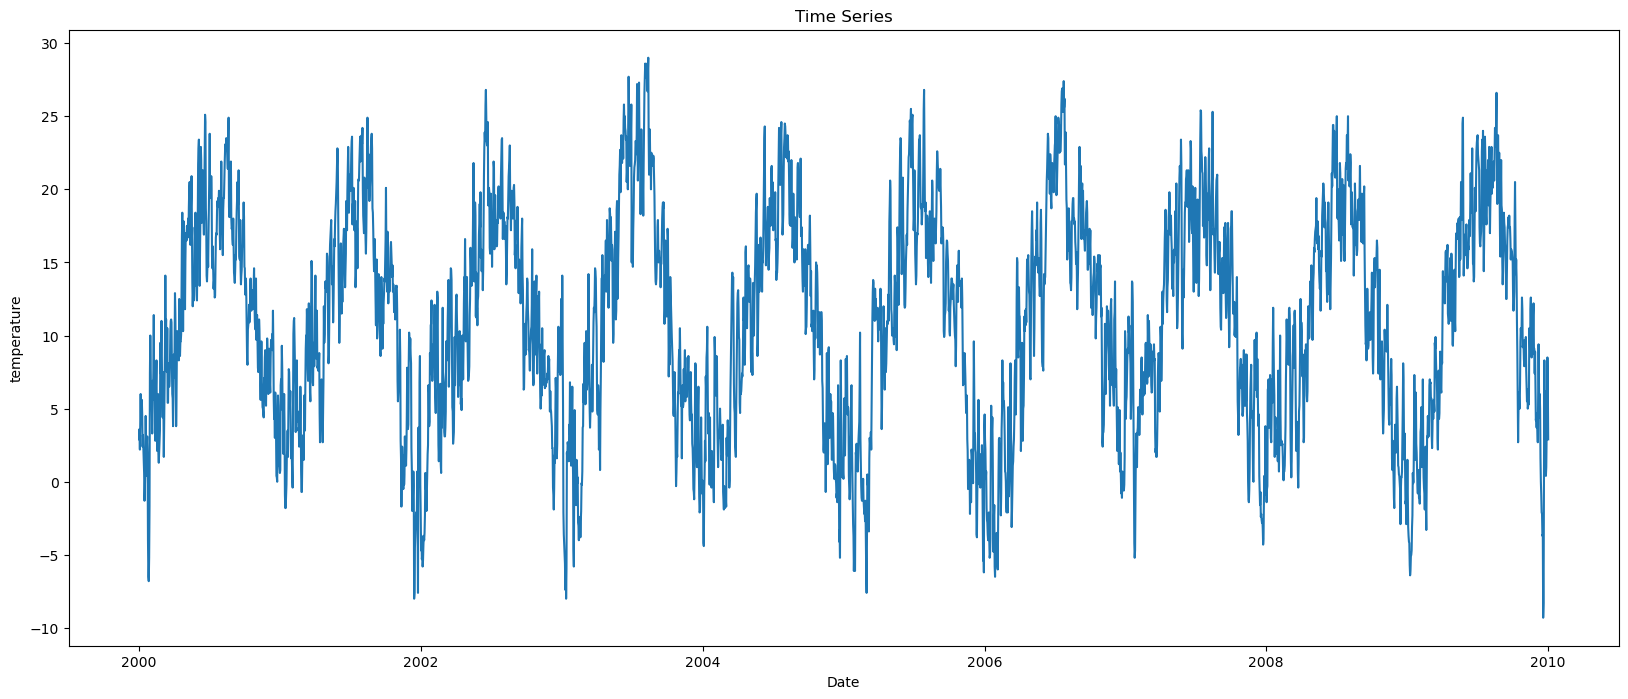

In [27]:
plt.figure(figsize=(20,8))
plt.plot(data_temp)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

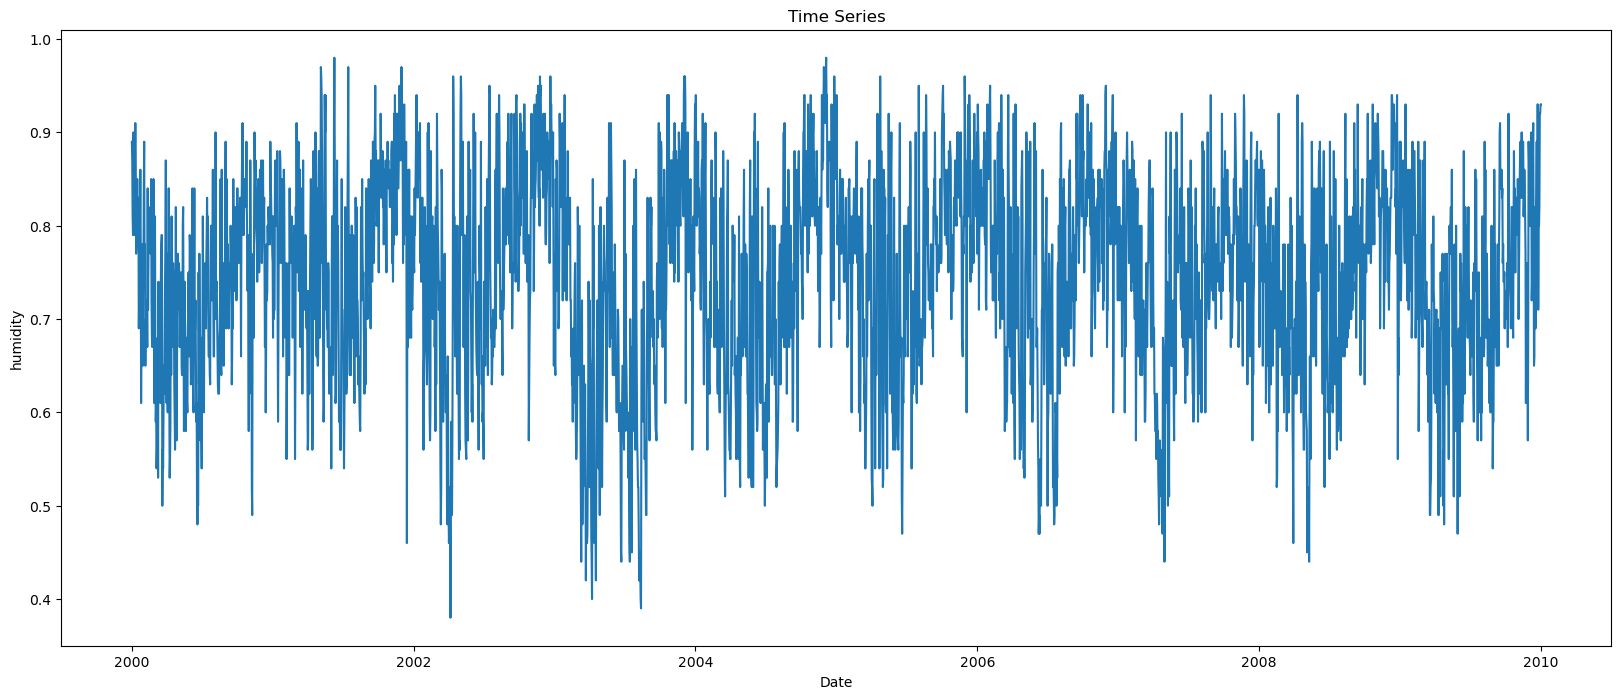

In [28]:
plt.figure(figsize=(20,8))
plt.plot(data_hum)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('humidity')
plt.show()

# Time Series Forecast using LSTM

In [29]:
df_temp=df_temp.values
df_temp = df_temp.astype('float32')

df_hum=df_hum.values
df_hum = df_hum.astype('float32')

In [30]:
df_temp, df_hum

(array([[ 2.9],
        [ 3.6],
        [ 2.2],
        ...,
        [16.4],
        [16.9],
        [16. ]], dtype=float32),
 array([[0.89],
        [0.87],
        [0.81],
        ...,
        [0.57],
        [0.47],
        [0.56]], dtype=float32))

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler_temp = MinMaxScaler(feature_range=(0, 1))
data_scaled_temp = scaler_temp.fit_transform(df_temp)

scaler_hum = MinMaxScaler(feature_range=(0, 1))
data_scaled_hum = scaler_hum.fit_transform(df_hum)

In [33]:
data_scaled_temp, data_scaled_hum

(array([[0.2945946 ],
        [0.31351352],
        [0.27567568],
        ...,
        [0.6594595 ],
        [0.672973  ],
        [0.6486487 ]], dtype=float32),
 array([[0.8499999 ],
        [0.8166666 ],
        [0.7166667 ],
        ...,
        [0.31666666],
        [0.14999998],
        [0.3       ]], dtype=float32))

# Preparation for Temperature & Humidity Prediction----->

In [34]:
##splitting dataset into train and test split
training_size_temp=int(len(data_scaled_temp)*0.75)
test_size_temp=len(data_scaled_temp)-training_size_temp
train_data_temp,test_data_temp = data_scaled_temp[0:training_size_temp,:],data_scaled_temp[training_size_temp:len(data_scaled_temp),:1]

In [35]:
##splitting dataset into train and test split
training_size_hum=int(len(data_scaled_hum)*0.75)
test_size_hum=len(data_scaled_hum)-training_size_hum
train_data_hum,test_data_hum = data_scaled_hum[0:training_size_hum,:],data_scaled_hum[training_size_hum:len(data_scaled_hum),:1]

In [36]:
training_size_temp,test_size_temp

(2579, 860)

In [37]:
training_size_hum,test_size_hum

(2579, 860)

In [38]:
train_data_temp, train_data_hum

(array([[0.2945946 ],
        [0.31351352],
        [0.27567568],
        ...,
        [0.54864866],
        [0.42972976],
        [0.32432434]], dtype=float32),
 array([[0.8499999 ],
        [0.8166666 ],
        [0.7166667 ],
        ...,
        [0.48333335],
        [0.5       ],
        [0.70000005]], dtype=float32))

In [39]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [40]:
time_step = 100
X_train_temp, y_train_temp = create_dataset(train_data_temp, time_step)
X_test_temp, y_test_temp = create_dataset(test_data_temp, time_step)

In [41]:
time_step = 100
X_train_hum, y_train_hum = create_dataset(train_data_hum, time_step)
X_test_hum, y_test_hum = create_dataset(test_data_hum, time_step)

In [42]:
print(X_train_temp.shape), print(y_train_temp.shape)
print(X_train_hum.shape), print(y_train_hum.shape)

(2478, 100)
(2478,)
(2478, 100)
(2478,)


(None, None)

In [43]:
print(X_test_temp.shape), print(y_test_temp.shape)
print(X_test_hum.shape), print(y_test_hum.shape)

(759, 100)
(759,)
(759, 100)
(759,)


(None, None)

In [44]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_temp =X_train_temp.reshape(X_train_temp.shape[0],X_train_temp.shape[1] , 1)
X_test_temp = X_test_temp.reshape(X_test_temp.shape[0],X_test_temp.shape[1] , 1)

X_train_hum =X_train_hum.reshape(X_train_hum.shape[0],X_train_hum.shape[1] , 1)
X_test_hum = X_test_hum.reshape(X_test_hum.shape[0],X_test_hum.shape[1] , 1)

# Build the LSTM Model for Temperature 

In [45]:
### Create the LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [46]:
model_temp=Sequential()
model_temp.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model_temp.add(LSTM(50,return_sequences=True))
model_temp.add(LSTM(50))
model_temp.add(Dense(1))
model_temp.compile(loss='mean_squared_error',optimizer='adam')

In [47]:
model_temp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model_temp.fit(X_train_temp,y_train_temp,validation_data=(X_test_temp,y_test_temp),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

39/39 [==============================] - 26s 301ms/step - loss: 0.0353 - val_loss: 0.0125
Epoch 2/100
39/39 [==============================] - 8s 203ms/step - loss: 0.0127 - val_loss: 0.0104
Epoch 3/100
39/39 [==============================] - 8s 209ms/step - loss: 0.0120 - val_loss: 0.0101
Epoch 4/100
39/39 [==============================] - 8s 200ms/step - loss: 0.0115 - val_loss: 0.0108
Epoch 5/100
39/39 [==============================] - 8s 217ms/step - loss: 0.0110 - val_loss: 0.0099
Epoch 6/100
39/39 [==============================] - 8s 202ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 7/100
39/39 [==============================] - 8s 214ms/step - loss: 0.0099 - val_loss: 0.0095
Epoch 8/100
39/39 [==============================] - 8s 206ms/step - loss: 0.0094 - val_loss: 0.0083
Epoch 9/100
39/39 [==============================] - 8s 216ms/step - loss: 0.0085 - val_loss: 0.0089
Epoch 10/100
39/39 [==============================] - 8s 206ms/step - loss: 0.0082 - val_

# Build the LSTM Model for Humidity 

In [49]:
model_hum=Sequential()
model_hum.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model_hum.add(LSTM(50,return_sequences=True))
model_hum.add(LSTM(50))
model_hum.add(Dense(1))
model_hum.compile(loss='mean_squared_error',optimizer='adam')

In [50]:
model_hum.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model_hum.fit(X_train_hum,y_train_hum,validation_data=(X_test_hum,y_test_hum),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
39/39 [==============================] - 23s 286ms/step - loss: 0.0623 - val_loss: 0.0226
Epoch 2/100
39/39 [==============================] - 8s 205ms/step - loss: 0.0263 - val_loss: 0.0243
Epoch 3/100
39/39 [==============================] - 8s 212ms/step - loss: 0.0264 - val_loss: 0.0228
Epoch 4/100
39/39 [==============================] - 8s 206ms/step - loss: 0.0259 - val_loss: 0.0225
Epoch 5/100
39/39 [==============================] - 8s 214ms/step - loss: 0.0258 - val_loss: 0.0224
Epoch 6/100
39/39 [==============================] - 8s 206ms/step - loss: 0.0255 - val_loss: 0.0224
Epoch 7/100
39/39 [==============================] - 8s 213ms/step - loss: 0.0258 - val_loss: 0.0225
Epoch 8/100
39/39 [==============================] - 8s 207ms/step - loss: 0.0261 - val_loss: 0.0227
Epoch 9/100
39/39 [==============================] - 8s 210ms/step - loss: 0.0258 - val_loss: 0.0222
Epoch 10/100
39/39 [==============================] - 8s 209ms/step - loss: 0.0251 - val_l

# Evaluate the model and Predict

In [52]:
import tensorflow as tf

In [53]:
### Lets Do the prediction and check performance metrics
train_predict_temp = model_temp.predict(X_train_temp)
test_predict_temp = model_temp.predict(X_test_temp)

train_predict_hum = model_hum.predict(X_train_hum)
test_predict_hum = model_hum.predict(X_test_hum)

24/24 [==============================] - 1s 58ms/step


In [54]:
##Transformback to original form
train_predict_temp = scaler_temp.inverse_transform(train_predict_temp)
test_predict_temp = scaler_temp.inverse_transform(test_predict_temp)

train_predict_hum = scaler_hum.inverse_transform(train_predict_hum)
test_predict_hum = scaler_hum.inverse_transform(test_predict_hum)

### Put the Temperature data on Graph which predict by LSTM Model

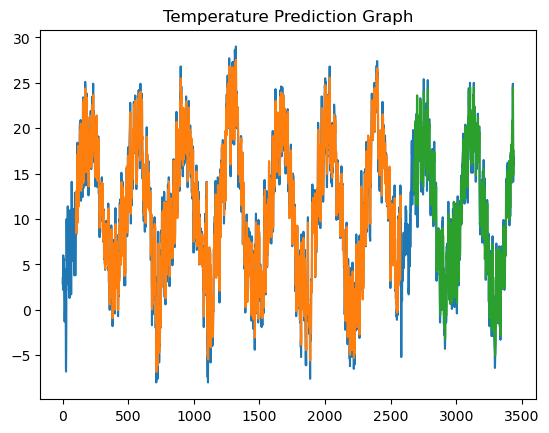

In [55]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data_scaled_temp)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_temp)+look_back, :] = train_predict_temp
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data_scaled_temp)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict_temp)+(look_back*2)+1:len(data_scaled_temp)-1, :] = test_predict_temp
# plot baseline and predictions
plt.title("Temperature Prediction Graph")
plt.plot(scaler_temp.inverse_transform(data_scaled_temp))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Put the Humidity data on Graph which predict by LSTM Model

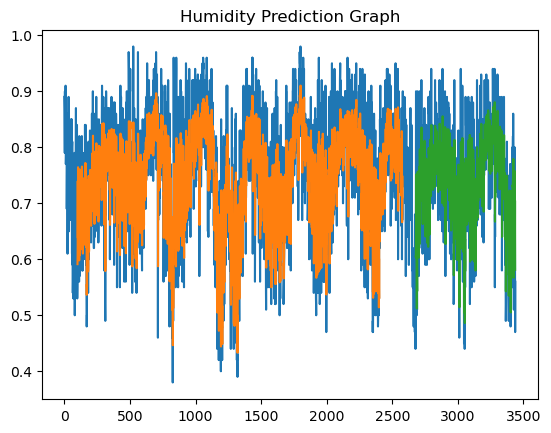

In [56]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data_scaled_hum)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_hum)+look_back, :] = train_predict_hum
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data_scaled_hum)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict_hum)+(look_back*2)+1:len(data_scaled_hum)-1, :] = test_predict_hum
# plot baseline and predictions
plt.title("Humidity Prediction Graph")
plt.plot(scaler_hum.inverse_transform(data_scaled_hum))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### see the mean squared error of LSTM model on Temperature & Humidity.

In [57]:
y_train_temp_inv = scaler_temp.inverse_transform([y_train_temp])
y_test_temp_inv = scaler_temp.inverse_transform([y_test_temp])

y_train_hum_inv = scaler_hum.inverse_transform([y_train_hum])
y_test_hum_inv = scaler_hum.inverse_transform([y_test_hum])

In [58]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [59]:
print("Shape of y_train_temp_inv:", y_train_temp_inv.reshape(-1,1).shape)
print("Shape of y_train_hum_inv:", y_train_hum_inv.reshape(-1,1).shape)
print("Shape of train_predict_lstm:", train_predict_temp.shape)
print("Shape of train_predict_rnn:", train_predict_hum.shape)

Shape of y_train_temp_inv: (2478, 1)
Shape of y_train_hum_inv: (2478, 1)
Shape of train_predict_lstm: (2478, 1)
Shape of train_predict_rnn: (2478, 1)


In [60]:
print("r2_score value on train data for temperature is: ",r2_score(y_train_temp_inv.reshape(-1,1),train_predict_temp))
print("r2_score value on train data for humidity is: ",r2_score(y_train_hum_inv.reshape(-1,1),train_predict_hum))

r2_score value on train data for temperature is:  0.9232061095209562
r2_score value on train data for humidity is:  0.5172035822956111


In [61]:
print("r2_score value on test data for temperature is: ",r2_score(y_test_temp_inv.reshape(-1,1),test_predict_temp))
print("r2_score value on test data for humidity is: ",r2_score(y_test_hum_inv.reshape(-1,1),test_predict_hum))

r2_score value on test data for temperature is:  0.9244907598960205
r2_score value on test data for humidity is:  0.37624692771954704


In [62]:
print("RMSE value on train data for temperature is: ",math.sqrt(mean_squared_error(y_train_temp_inv.reshape(-1,1),train_predict_temp)))
print("RMSE value on train data for humidity is: ",math.sqrt(mean_squared_error(y_train_hum_inv.reshape(-1,1),train_predict_hum)))

RMSE value on train data for temperature is:  2.0833887405552516
RMSE value on train data for humidity is:  0.077372508875867


In [63]:
print("RMSE value on test data for temperature is: ",math.sqrt(mean_squared_error(y_test_temp_inv.reshape(-1,1),test_predict_temp)))
print("RMSE value on test data for humidity is: ",math.sqrt(mean_squared_error(y_test_hum_inv.reshape(-1,1),test_predict_hum)))

RMSE value on test data for temperature is:  1.9909874118084978
RMSE value on test data for humidity is:  0.07762016222890432


## Accuracy Score of test data for Temperature & Humidity.

In [64]:
y_test_temp_inv.reshape(-1,1).shape,test_predict_temp.shape

((759, 1), (759, 1))

In [65]:
y_test_hum_inv.reshape(-1,1).shape,test_predict_hum.shape

((759, 1), (759, 1))

In [66]:
from sklearn.metrics import r2_score

In [67]:
r2_score(y_test_temp_inv.reshape(-1,1),test_predict_temp)

0.9244907598960205

In [68]:
r2_score(y_test_hum_inv.reshape(-1,1),test_predict_hum)

0.37624692771954704

### comparison between LSTM  model prediction on training data

In [69]:
train_predict_temp, train_predict_temp.shape

(array([[10.458074 ],
        [ 9.949882 ],
        [ 9.4407625],
        ...,
        [12.604849 ],
        [11.367722 ],
        [10.271789 ]], dtype=float32),
 (2478, 1))

In [70]:
train_predict_hum, train_predict_hum.shape

(array([[0.5912655 ],
        [0.61652184],
        [0.7396757 ],
        ...,
        [0.6662456 ],
        [0.74897486],
        [0.7099049 ]], dtype=float32),
 (2478, 1))

In [71]:
y_train_temp_inv, y_train_temp_inv.shape

(array([[10.20000062,  9.60000055,  8.40000041, ..., 13.60000028,
         12.29999976,  7.90000072]]),
 (1, 2478))

In [72]:
y_train_temp_inv = y_train_temp_inv.reshape(-1,1)
y_train_temp_inv.shape

(2478, 1)

In [73]:
y_train_hum_inv, y_train_hum_inv.shape

(array([[0.58999999, 0.77      , 0.63999998, ..., 0.70999998, 0.67000002,
         0.68000001]]),
 (1, 2478))

In [74]:
y_train_hum_inv = y_train_hum_inv.reshape(-1,1)
y_train_hum_inv.shape

(2478, 1)

In [75]:
train_opt_temp = pd.DataFrame(y_train_temp_inv)
train_opt_temp = train_opt_temp.rename(columns={ 0: 'TrueValue(Train)'})
train_opt_temp['Temperature Predictions'] = train_predict_temp
train_opt_temp

,TrueValue(Train),Temperature Predictions
0,10.200001,10.458074
1,9.600001,9.949882
2,8.400000,9.440763
3,8.300000,8.432211
4,12.500001,8.670100
5,10.000000,13.106551
6,8.600001,9.433828
7,9.600001,8.515991
8,9.600001,10.143991
9,10.100000,9.868618


In [76]:
train_opt_hum = pd.DataFrame(y_train_hum_inv)
train_opt_hum = train_opt_hum.rename(columns={ 0: 'TrueValue(Train)'})
train_opt_hum['Humidity Predictions'] = train_predict_hum
train_opt_hum

,TrueValue(Train),Humidity Predictions
0,0.59,0.591265
1,0.77,0.616522
2,0.64,0.739676
3,0.81,0.638204
4,0.69,0.764396
5,0.67,0.666026
6,0.75,0.677932
7,0.76,0.713536
8,0.75,0.720299
9,0.71,0.720545


### comparison between LSTM  model prediction on testing data

In [77]:
test_predict_temp[:5], test_predict_temp.shape

(array([[13.146065],
        [14.925861],
        [14.172535],
        [13.132171],
        [16.491571]], dtype=float32),
 (759, 1))

In [78]:
test_predict_hum[:5], test_predict_hum.shape

(array([[0.60505205],
        [0.60322136],
        [0.67953444],
        [0.7513666 ],
        [0.6100698 ]], dtype=float32),
 (759, 1))

In [79]:
y_test_temp_inv.shape

(1, 759)

In [80]:
y_test_temp_inv = y_test_temp_inv.reshape(-1,1)
y_test_temp_inv.shape

(759, 1)

In [81]:
y_test_hum_inv.shape

(1, 759)

In [82]:
y_test_hum_inv = y_test_hum_inv.reshape(-1,1)
y_test_hum_inv.shape

(759, 1)

In [83]:
test_opt_temp = pd.DataFrame(y_test_temp_inv)
test_opt_temp = test_opt_temp.rename(columns={ 0: 'TrueValue(Test)'})
test_opt_temp['Temperature Predictions'] = test_predict_temp
test_opt_temp

,TrueValue(Test),Temperature Predictions
0,14.300001,13.146065
1,13.700001,14.925861
2,12.699999,14.172535
3,15.800000,13.132171
4,14.999999,16.491571
5,15.900000,15.269254
6,15.500001,16.180765
7,18.499999,15.842617
8,17.100000,18.918449
9,17.299999,17.121071


In [84]:
test_opt_hum = pd.DataFrame(y_test_hum_inv)
test_opt_hum = test_opt_hum.rename(columns={ 0: 'TrueValue(Test)'})
test_opt_hum['Humidity Predictions'] = test_predict_hum
test_opt_hum

,TrueValue(Test),Humidity Predictions
0,0.63,0.605052
1,0.71,0.603221
2,0.90,0.679534
3,0.61,0.751367
4,0.66,0.610070
5,0.74,0.653884
6,0.70,0.672710
7,0.50,0.660510
8,0.58,0.511942
9,0.56,0.608384


## Weather Predictions for next 30 Days

### weather prediction for Temperature using LSTM Model

In [85]:
len(test_data_temp)

860

In [86]:
x_input=test_data_temp[760:].reshape(1,-1)
x_input.shape

(1, 100)

In [87]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [88]:
temp_input

[0.30000001192092896,
 0.29729729890823364,
 0.3378378450870514,
 0.3243243396282196,
 0.30000001192092896,
 0.32702702283859253,
 0.39459460973739624,
 0.4054054021835327,
 0.39729732275009155,
 0.40000003576278687,
 0.3675675690174103,
 0.3702702522277832,
 0.30270272493362427,
 0.27837836742401123,
 0.31351351737976074,
 0.36216217279434204,
 0.33243244886398315,
 0.3675675690174103,
 0.35945945978164673,
 0.34594595432281494,
 0.4729729890823364,
 0.46216219663619995,
 0.4837837815284729,
 0.44324326515197754,
 0.4162162244319916,
 0.408108115196228,
 0.38108110427856445,
 0.29729729890823364,
 0.2756756842136383,
 0.3540540635585785,
 0.4216216206550598,
 0.33243244886398315,
 0.34324324131011963,
 0.4054054021835327,
 0.4567567706108093,
 0.408108115196228,
 0.3864865005016327,
 0.38108110427856445,
 0.44864869117736816,
 0.435135155916214,
 0.5297297239303589,
 0.6054053902626038,
 0.5513513684272766,
 0.5648648738861084,
 0.5945945978164673,
 0.5945945978164673,
 0.545945942401

In [89]:
from numpy import array

output_30days_temp = []
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
#         print(temp_input)
        x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_temp.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output_30days_temp.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_temp.predict(x_input, verbose=0)
#         print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        output_30days_temp.extend(yhat.tolist())
        i=i+1
    

print(output_30days_temp)

[[0.6640827655792236], [0.683257520198822], [0.700821578502655], [0.7142159342765808], [0.7252814769744873], [0.735184907913208], [0.7444442510604858], [0.753187358379364], [0.7613533139228821], [0.7688454389572144], [0.7756074070930481], [0.7816194891929626], [0.7869114875793457], [0.7915155291557312], [0.7954917550086975], [0.798926055431366], [0.801905632019043], [0.8044800162315369], [0.8067147135734558], [0.8086568117141724], [0.8103474378585815], [0.8118731379508972], [0.8132575154304504], [0.8145255446434021], [0.8156787157058716], [0.8167266845703125], [0.8176897764205933], [0.8185798525810242], [0.8193899989128113], [0.8201375007629395]]


### weather prediction for Humidity using LSTM Model

In [90]:
len(test_data_hum)

860

In [91]:
x_input=test_data_hum[760:].reshape(1,-1)
x_input.shape

(1, 100)

In [92]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [93]:
temp_input

[0.75,
 0.8166666030883789,
 0.75,
 0.6666666269302368,
 0.5499999523162842,
 0.5333333015441895,
 0.5166666507720947,
 0.4833333492279053,
 0.5499999523162842,
 0.8166666030883789,
 0.7833333015441895,
 0.6333333253860474,
 0.8499999046325684,
 0.8499999046325684,
 0.5333333015441895,
 0.5499999523162842,
 0.5833333730697632,
 0.6000000238418579,
 0.5666667222976685,
 0.5,
 0.43333327770233154,
 0.5333333015441895,
 0.34999996423721313,
 0.44999992847442627,
 0.5499999523162842,
 0.4833333492279053,
 0.18333333730697632,
 0.18333333730697632,
 0.2333332896232605,
 0.24999994039535522,
 0.38333332538604736,
 0.6666666269302368,
 0.5666667222976685,
 0.5666667222976685,
 0.5666667222976685,
 0.7166666984558105,
 0.5833333730697632,
 0.5666667222976685,
 0.3999999761581421,
 0.5166666507720947,
 0.5499999523162842,
 0.38333332538604736,
 0.5333333015441895,
 0.5499999523162842,
 0.46666669845581055,
 0.36666667461395264,
 0.5333333015441895,
 0.3999999761581421,
 0.18333333730697632,
 0.

In [94]:
from numpy import array

output_30days_hum = []
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_hum.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output_30days_hum.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_hum.predict(x_input, verbose=0)
#         print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        output_30days_hum.extend(yhat.tolist())
        i=i+1
    

print(output_30days_hum)

[[0.3893830478191376], [0.418836772441864], [0.45650747418403625], [0.4745481014251709], [0.48013442754745483], [0.4788682460784912], [0.4755008816719055], [0.4731651544570923], [0.4732334017753601], [0.47573336958885193], [0.4797886610031128], [0.4843028783798218], [0.4882870614528656], [0.49096381664276123], [0.49211493134498596], [0.49199777841567993], [0.4909313917160034], [0.48930925130844116], [0.487509548664093], [0.4858153760433197], [0.48439282178878784], [0.483295202255249], [0.48245149850845337], [0.48185935616493225], [0.48140257596969604], [0.48098915815353394], [0.48063424229621887], [0.480429470539093], [0.48033607006073], [0.4803099036216736]]


In [95]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [96]:
import matplotlib.pyplot as plt

In [97]:
len(data_scaled_temp), len(data_scaled_hum)

(3439, 3439)

## Plot the next 30 days Temperature prediction data on Graph by LSTM Model

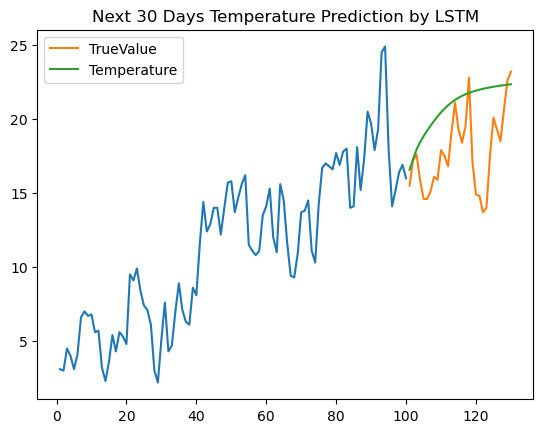

In [98]:
plt.plot(day_new,scaler_temp.inverse_transform(data_scaled_temp[3339:]))
plt.plot(day_pred, df_temp_june.values, label="TrueValue")
plt.plot(day_pred,scaler_temp.inverse_transform(output_30days_temp), label="Temperature")
plt.title("Next 30 Days Temperature Prediction by LSTM")
plt.legend()
plt.show()

## Plot the next 30 days Humidity prediction data on Graph by LSTM Model

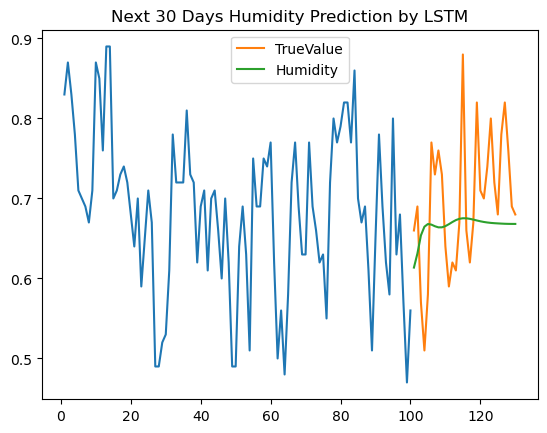

In [99]:
plt.plot(day_new,scaler_hum.inverse_transform(data_scaled_hum[3339:]))
plt.plot(day_pred, df_hum_june.values, label="TrueValue")
plt.plot(day_pred,scaler_hum.inverse_transform(output_30days_hum), label="Humidity")
plt.title("Next 30 Days Humidity Prediction by LSTM")
plt.legend()
plt.show()

In [100]:
df_temp_may.index[-1], df_hum_may.index[-1]

(Timestamp('2009-05-31 00:00:00'), Timestamp('2009-05-31 00:00:00'))

In [101]:
type(df_temp_may.index[-1]), type(df_hum_may.index[-1])

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

#### create a list which content next 30 days Date

In [102]:
from datetime import datetime, timedelta

# Assuming your initial datetime variable is dt
dt = df_temp_may.index[-1].date()
dt_after_30_days = []
# Increase by 30 days and print all dates
for i in range(30):
    dt_after_30_days.append(dt + timedelta(days=i+1))

dt_after_30_days

[datetime.date(2009, 6, 1),
 datetime.date(2009, 6, 2),
 datetime.date(2009, 6, 3),
 datetime.date(2009, 6, 4),
 datetime.date(2009, 6, 5),
 datetime.date(2009, 6, 6),
 datetime.date(2009, 6, 7),
 datetime.date(2009, 6, 8),
 datetime.date(2009, 6, 9),
 datetime.date(2009, 6, 10),
 datetime.date(2009, 6, 11),
 datetime.date(2009, 6, 12),
 datetime.date(2009, 6, 13),
 datetime.date(2009, 6, 14),
 datetime.date(2009, 6, 15),
 datetime.date(2009, 6, 16),
 datetime.date(2009, 6, 17),
 datetime.date(2009, 6, 18),
 datetime.date(2009, 6, 19),
 datetime.date(2009, 6, 20),
 datetime.date(2009, 6, 21),
 datetime.date(2009, 6, 22),
 datetime.date(2009, 6, 23),
 datetime.date(2009, 6, 24),
 datetime.date(2009, 6, 25),
 datetime.date(2009, 6, 26),
 datetime.date(2009, 6, 27),
 datetime.date(2009, 6, 28),
 datetime.date(2009, 6, 29),
 datetime.date(2009, 6, 30)]

#### create a list which content next 30 days temperature value predicted by LSTM Model

In [103]:
predicted_30_days_output_temp = scaler_temp.inverse_transform(output_30days_temp)
predicted_30_days_output_temp

array([[16.57106173],
       [17.28052764],
       [17.93039778],
       [18.42598893],
       [18.835414  ],
       [19.20184093],
       [19.54443662],
       [19.86793159],
       [20.17007193],
       [20.44728055],
       [20.69747337],
       [20.9199204 ],
       [21.11572434],
       [21.28607387],
       [21.43319422],
       [21.56026334],
       [21.67050767],
       [21.76575988],
       [21.84844368],
       [21.92030131],
       [21.98285447],
       [22.03930538],
       [22.09052734],
       [22.13744442],
       [22.18011175],
       [22.2188866 ],
       [22.25452099],
       [22.28745381],
       [22.31742923],
       [22.34508679]])

#### create a list which content next 30 days humidity value predicted by LSTM Model

In [104]:
predicted_30_days_output_hum = scaler_hum.inverse_transform(output_30days_hum)
predicted_30_days_output_hum

array([[0.61362984],
       [0.63130207],
       [0.6539045 ],
       [0.66472887],
       [0.66808067],
       [0.66732096],
       [0.66530054],
       [0.6638991 ],
       [0.66394005],
       [0.66544003],
       [0.66787321],
       [0.67058174],
       [0.67297225],
       [0.6745783 ],
       [0.67526897],
       [0.67519868],
       [0.67455885],
       [0.67358556],
       [0.67250574],
       [0.67148924],
       [0.6706357 ],
       [0.66997713],
       [0.66947091],
       [0.66911562],
       [0.66884156],
       [0.66859351],
       [0.66838056],
       [0.66825769],
       [0.66820165],
       [0.66818595]])

#### Truevalue of June month Temperature 

In [105]:
df_temp_june

,temp_avg
Date,
2009-06-01,15.5
2009-06-02,17.2
2009-06-03,17.6
2009-06-04,15.9
2009-06-05,14.6
2009-06-06,14.6
2009-06-07,15.1
2009-06-08,16.1
2009-06-09,15.9


#### Truevalue of June month Humidity 

In [106]:
df_hum_june

,humidity
Date,
2009-06-01,0.66
2009-06-02,0.69
2009-06-03,0.57
2009-06-04,0.51
2009-06-05,0.58
2009-06-06,0.77
2009-06-07,0.73
2009-06-08,0.76
2009-06-09,0.73


In [107]:
list_june_temp = df_temp_june.values
list_june_temp

array([[15.5],
       [17.2],
       [17.6],
       [15.9],
       [14.6],
       [14.6],
       [15.1],
       [16.1],
       [15.9],
       [17.9],
       [17.5],
       [16.8],
       [19.1],
       [21.1],
       [19.3],
       [18.4],
       [19.5],
       [22.8],
       [17.1],
       [14.9],
       [14.8],
       [13.7],
       [14. ],
       [17.5],
       [20.1],
       [19.3],
       [18.5],
       [20.6],
       [22.6],
       [23.2]])

In [108]:
list_june_hum = df_hum_june.values
list_june_hum

array([[0.66],
       [0.69],
       [0.57],
       [0.51],
       [0.58],
       [0.77],
       [0.73],
       [0.76],
       [0.73],
       [0.64],
       [0.59],
       [0.62],
       [0.61],
       [0.67],
       [0.88],
       [0.66],
       [0.62],
       [0.67],
       [0.82],
       [0.71],
       [0.7 ],
       [0.74],
       [0.8 ],
       [0.72],
       [0.68],
       [0.78],
       [0.82],
       [0.76],
       [0.69],
       [0.68]])

#### convert the list into Dataframe

In [109]:
df1 = pd.DataFrame(dt_after_30_days, columns=['Date'])
df2 = pd.DataFrame(list_june_temp, columns=['Truevalue Temperature'])
df3 = pd.DataFrame(predicted_30_days_output_temp, columns=['Predicted Temperature'])

In [110]:
df4 = pd.DataFrame(dt_after_30_days, columns=['Date'])
df5 = pd.DataFrame(list_june_hum, columns=['Truevalue Humidity'])
df6 = pd.DataFrame(predicted_30_days_output_hum, columns=['Predicted Humidity'])

#### Merge the DataFrame

In [111]:
next_30_days_temp_output = pd.concat([df1,df2,df3], axis=1)
next_30_days_hum_output = pd.concat([df4,df5,df6], axis=1)

# See the Temperature comparision between LSTM & RNN model with Next 30 days Date

In [112]:
next_30_days_temp_output

,Date,Truevalue Temperature,Predicted Temperature
0,2009-06-01,15.5,16.571062
1,2009-06-02,17.2,17.280528
2,2009-06-03,17.6,17.930398
3,2009-06-04,15.9,18.425989
4,2009-06-05,14.6,18.835414
5,2009-06-06,14.6,19.201841
6,2009-06-07,15.1,19.544437
7,2009-06-08,16.1,19.867932
8,2009-06-09,15.9,20.170072
9,2009-06-10,17.9,20.447281


In [113]:
next_30_days_hum_output

,Date,Truevalue Humidity,Predicted Humidity
0,2009-06-01,0.66,0.613630
1,2009-06-02,0.69,0.631302
2,2009-06-03,0.57,0.653904
3,2009-06-04,0.51,0.664729
4,2009-06-05,0.58,0.668081
5,2009-06-06,0.77,0.667321
6,2009-06-07,0.73,0.665301
7,2009-06-08,0.76,0.663899
8,2009-06-09,0.73,0.663940
9,2009-06-10,0.64,0.665440


## Now we see the Accurecy score and RMSE score on june, 2009 

### Claculate Accuracy Score on Temperature 

In [114]:
from sklearn.metrics import r2_score

In [115]:
predicted_30_days_output_temp, predicted_30_days_output_hum

(array([[16.57106173],
        [17.28052764],
        [17.93039778],
        [18.42598893],
        [18.835414  ],
        [19.20184093],
        [19.54443662],
        [19.86793159],
        [20.17007193],
        [20.44728055],
        [20.69747337],
        [20.9199204 ],
        [21.11572434],
        [21.28607387],
        [21.43319422],
        [21.56026334],
        [21.67050767],
        [21.76575988],
        [21.84844368],
        [21.92030131],
        [21.98285447],
        [22.03930538],
        [22.09052734],
        [22.13744442],
        [22.18011175],
        [22.2188866 ],
        [22.25452099],
        [22.28745381],
        [22.31742923],
        [22.34508679]]),
 array([[0.61362984],
        [0.63130207],
        [0.6539045 ],
        [0.66472887],
        [0.66808067],
        [0.66732096],
        [0.66530054],
        [0.6638991 ],
        [0.66394005],
        [0.66544003],
        [0.66787321],
        [0.67058174],
        [0.67297225],
        [0.6745783 ],


In [116]:
list_june_temp, list_june_hum

(array([[15.5],
        [17.2],
        [17.6],
        [15.9],
        [14.6],
        [14.6],
        [15.1],
        [16.1],
        [15.9],
        [17.9],
        [17.5],
        [16.8],
        [19.1],
        [21.1],
        [19.3],
        [18.4],
        [19.5],
        [22.8],
        [17.1],
        [14.9],
        [14.8],
        [13.7],
        [14. ],
        [17.5],
        [20.1],
        [19.3],
        [18.5],
        [20.6],
        [22.6],
        [23.2]]),
 array([[0.66],
        [0.69],
        [0.57],
        [0.51],
        [0.58],
        [0.77],
        [0.73],
        [0.76],
        [0.73],
        [0.64],
        [0.59],
        [0.62],
        [0.61],
        [0.67],
        [0.88],
        [0.66],
        [0.62],
        [0.67],
        [0.82],
        [0.71],
        [0.7 ],
        [0.74],
        [0.8 ],
        [0.72],
        [0.68],
        [0.78],
        [0.82],
        [0.76],
        [0.69],
        [0.68]]))

In [117]:
print("r2_score on Temperature: ",r2_score(list_june_temp, predicted_30_days_output_temp))

r2_score on Temperature:  -1.2831163059164727


In [118]:
print("r2_score on Humidity: ",r2_score(list_june_hum, predicted_30_days_output_hum))

r2_score on Humidity:  -0.10492471801365366


In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
print("mean_squared_error on Temperature: ",math.sqrt(mean_squared_error(list_june_temp, predicted_30_days_output_temp)))

mean_squared_error on Temperature:  3.9479073583212805


In [121]:
print("mean_squared_error on Humidity: ",math.sqrt(mean_squared_error(list_june_hum, predicted_30_days_output_hum)))

mean_squared_error on Humidity:  0.08645630658285869
